In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('VE_2018-2019.csv', index_col=0)

In [3]:
df.head()
df.keys()

Index(['Qty', 'Avg Price', 'Gross Rev', 'Incl Tax', 'Comp ', 'Promo $',
       'Net Rev', 'Quantity_SD_percent', 'Quantity_MSD_percent',
       'Quantity_All_percent', 'Net_SD_percent', 'Net_MSD_percent',
       'Net_All_percent'],
      dtype='object')

#### Convert Gross Rev column to number values, remove period and comma, and sort descending


In [4]:
gross_rev = df["Gross Rev"].str.replace(',', '').astype('float')
gross_rev = gross_rev.sort_values(ascending=False)

In [5]:
gross_rev.head(15)

Item Name
FOOD                 3546864.34
FOOD                 3300141.81
BEER                 3208476.91
DRAFT BEER           3000163.66
LIQUOR               1129051.35
Liquor               1129051.35
VON ELROD             229076.32
BOTTLE BEER           208313.25
B.A.M. MIMOSA         198828.00
CHEESEBURGER - VE     128200.50
PRETZEL               126517.50
WINE                  125715.00
WINE                  125715.00
ANGRY BIRD            123027.80
FROZEN PALOMA         119821.00
Name: Gross Rev, dtype: float64

#### Remove rows showing aggregate totals

In [6]:
gross_rev = gross_rev.drop(['FOOD', 'BEER', 'DRAFT BEER', 'LIQUOR', 'Liquor', 'WINE'])

In [7]:
gross_rev.dropna()

Item Name
VON ELROD                   229076.32
BOTTLE BEER                 208313.25
B.A.M. MIMOSA               198828.00
CHEESEBURGER - VE           128200.50
PRETZEL                     126517.50
                              ...    
Extra PORK GREEN CHILE           0.00
No Dressing                      0.00
No PUMPKIN SEED                  0.00
Extra BOTH SMOKER SAUCES         0.00
Side HOUSE LATTICE CHIPS         0.00
Name: Gross Rev, Length: 1484, dtype: float64

In [8]:
gross_rev.head(25)

Item Name
VON ELROD                  229076.32
BOTTLE BEER                208313.25
B.A.M. MIMOSA              198828.00
CHEESEBURGER - VE          128200.50
PRETZEL                    126517.50
ANGRY BIRD                 123027.80
FROZEN PALOMA              119821.00
TITOS VODKA                116306.00
FRIED CHEESE CURDS         113002.70
SPATEN MUNICH LAGER 1L     102759.00
EVENT LBW                  101657.32
OTHER                      101657.32
EVENT LBW                  101657.32
TINY BOMB PILSNER 1L        93849.75
AVOCADO CRUNCH              87151.35
Chicken Biscuit             86804.30
PAULANER OKTOBERFEST 1L     85714.50
HOT CHICKEN SLIDERS         85602.55
PRETZEL 2018                83056.05
TINY BOMB PILSNER .5        82754.75
NA BEVERAGE                 80346.58
N/A BEV                     80346.58
REISSDORF KOLSCH CG         77880.25
REISSDORF KOLSCH 1L         75860.50
THE VON'S BREAKFAST         72686.10
Name: Gross Rev, dtype: float64

#### Make sure all data types, columns, etc. are in the right place

In [12]:
gross_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Item Name  1493 non-null   object 
 1   Gross Rev  1484 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.5+ KB


#### reset index and convert the gross_rev series to a DataFrame

In [10]:
gross_rev = gross_rev.reset_index()
gross_rev = pd.DataFrame(gross_rev)

#### Limit the DataFrame to the first 14 items

In [13]:
gross_rev = gross_rev.iloc[:15]

#### Now we build a simple (but hopefully readable) bar plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

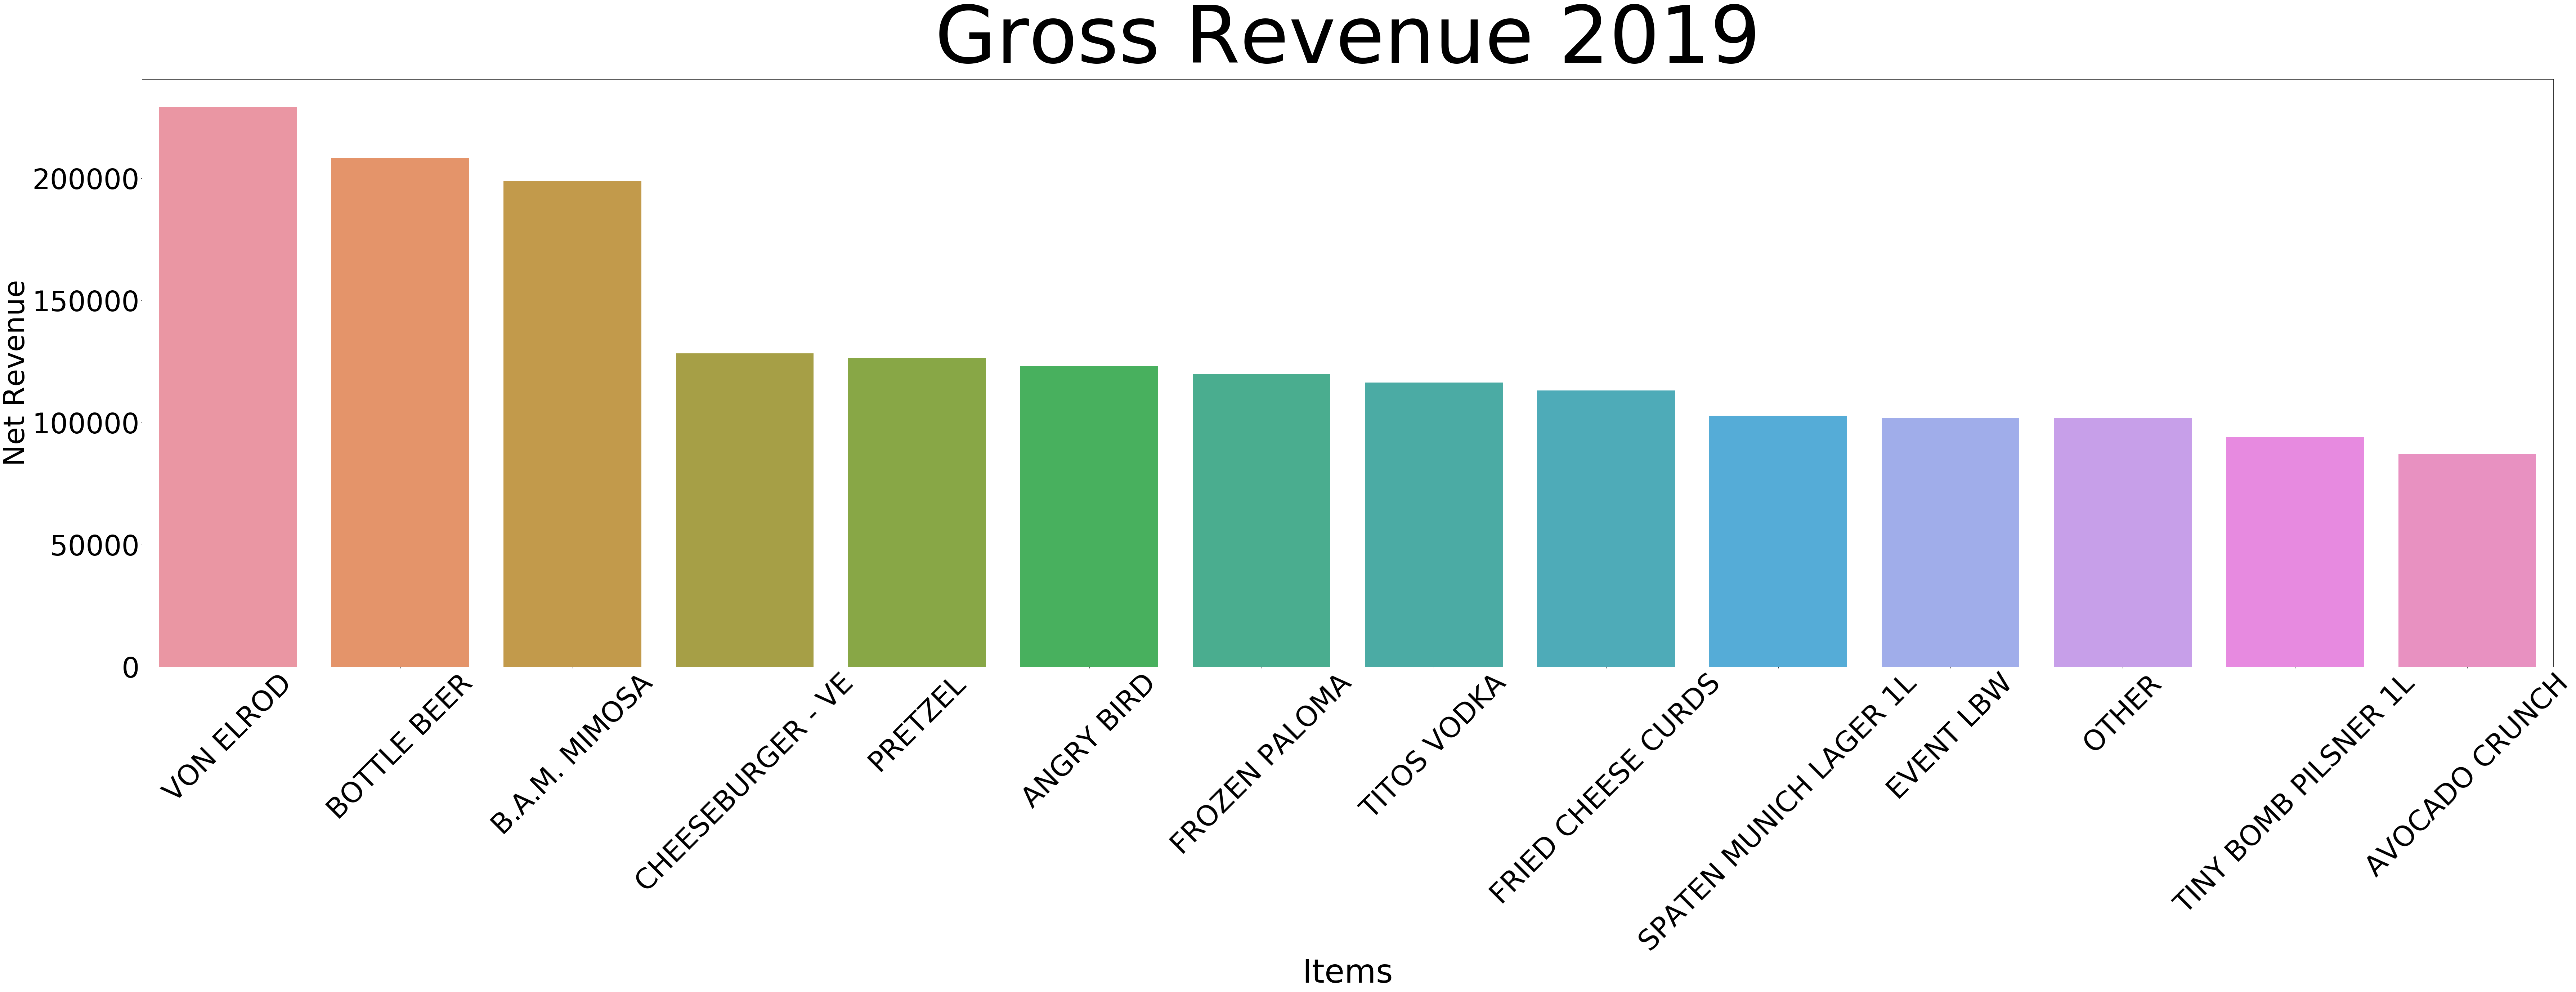

In [14]:
plt.figure(figsize=(120, 30))
b = sns.barplot(x='Item Name',y='Gross Rev',data=gross_rev)
b.axes.set_title("Gross Revenue 2019",fontsize=220)
b.set_xlabel("Items",fontsize=90)
b.set_ylabel("Net Revenue",fontsize=80)
b.tick_params(labelsize=78)
plt.xticks(rotation=45)

#### Now we do the same thing with Net Rev

In [9]:
net_rev = df["Net Rev"].str.replace(',', '').astype('float')
net_rev = net_rev.sort_values(ascending=False)

In [10]:
net_rev = net_rev.dropna()

In [11]:
net_rev = net_rev.drop(['FOOD', 'BEER', 'DRAFT BEER', 'LIQUOR', 'Liquor', 'WINE'])
net_rev.dropna()

Item Name
Total:                    7889296.49
BOTTLE BEER                205802.12
VON ELROD                  204571.22
B.A.M. MIMOSA              197610.77
PRETZEL                    121024.24
                             ...    
No BRISKET - MOD                0.00
No BRATWURST                    0.00
No BEER CHEESE (LARGE)          0.00
SD SWEET FRIES                  0.00
Side SD SWEET JOJOS             0.00
Name: Net Rev, Length: 1485, dtype: float64

In [12]:
net_rev.head(25)

Item Name
Total:                     7889296.49
BOTTLE BEER                 205802.12
VON ELROD                   204571.22
B.A.M. MIMOSA               197610.77
PRETZEL                     121024.24
CHEESEBURGER - VE           119609.71
ANGRY BIRD                  118568.55
FROZEN PALOMA               118529.72
TITOS VODKA                 115115.74
FRIED CHEESE CURDS          107943.71
OTHER                       101449.90
EVENT LBW                   101449.90
EVENT LBW                   101449.90
SPATEN MUNICH LAGER 1L       93295.70
TINY BOMB PILSNER 1L         92953.37
Chicken Biscuit              85003.43
AVOCADO CRUNCH               82244.91
TINY BOMB PILSNER .5         81729.73
HOT CHICKEN SLIDERS          80968.67
PRETZEL 2018                 78476.29
NA BEVERAGE                  78185.95
N/A BEV                      78185.95
PAULANER OKTOBERFEST 1L      77575.23
THE VON'S BREAKFAST          70468.96
REISSDORF KOLSCH CG          70194.42
Name: Net Rev, dtype: float64

In [13]:
net_rev.keys()

Index(['Total:', 'BOTTLE BEER', 'VON ELROD', 'B.A.M. MIMOSA', 'PRETZEL',
       'CHEESEBURGER - VE', 'ANGRY BIRD', 'FROZEN PALOMA', 'TITOS VODKA',
       'FRIED CHEESE CURDS',
       ...
       'No COLESLAW', 'No ALMONDS', 'No CARAMELIZED ONIONS', 'No Radish',
       'No TABASCO BUTTER', 'No BRISKET - MOD', 'No BRATWURST',
       'No BEER CHEESE (LARGE)', 'SD SWEET FRIES', 'Side SD SWEET JOJOS'],
      dtype='object', name='Item Name', length=1485)

In [14]:
net_rev = net_rev.reset_index()

In [15]:
net_rev = pd.DataFrame(net_rev)

In [16]:
net_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Item Name  1485 non-null   object 
 1   Net Rev    1485 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.3+ KB


In [17]:
net_rev.keys()

Index(['Item Name', 'Net Rev'], dtype='object')

In [42]:
net_rev.head()
net_rev = net_rev.iloc[:15]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

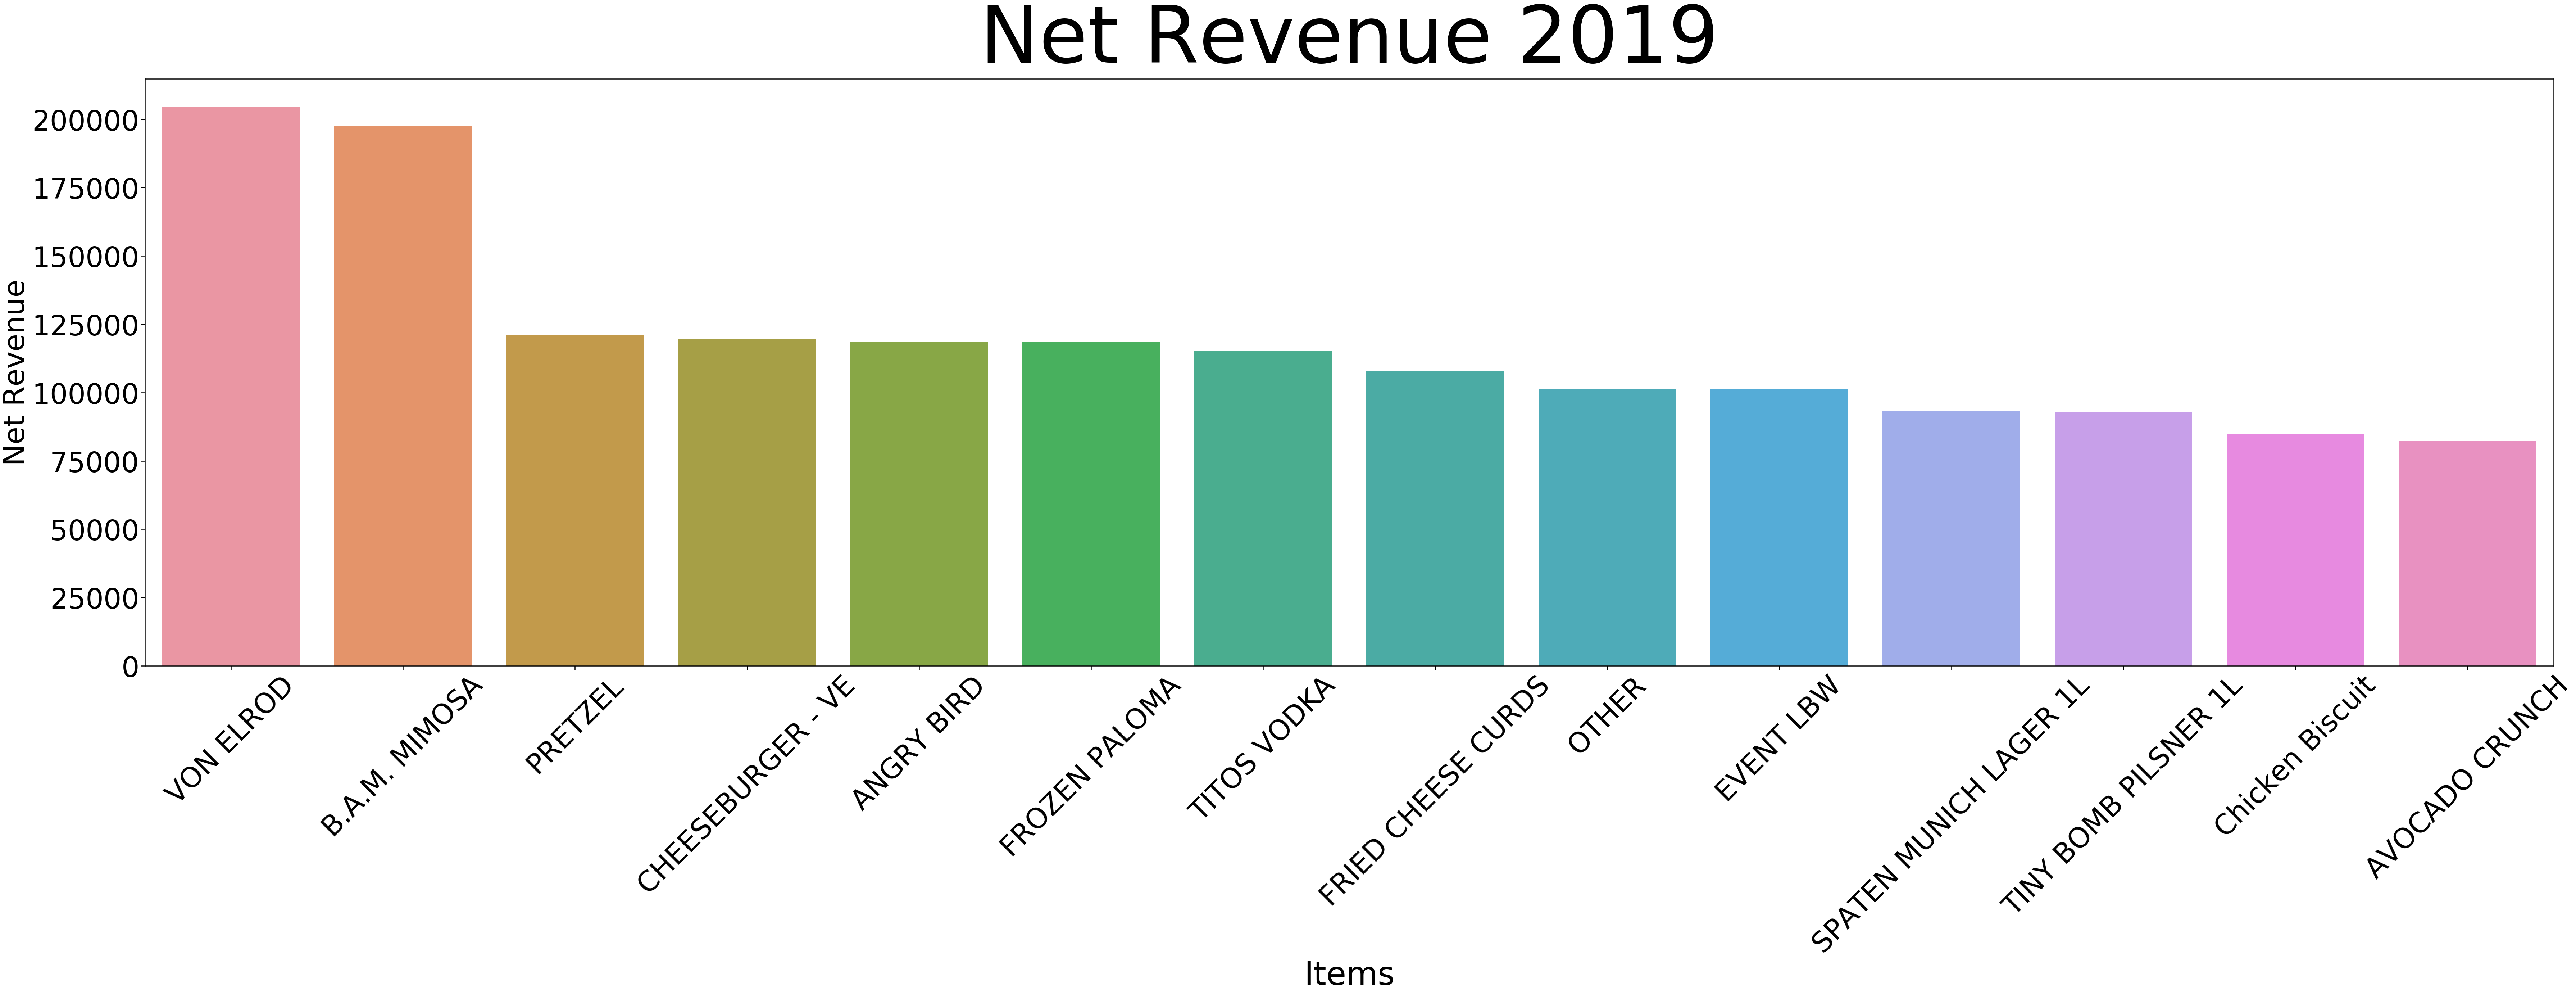

In [63]:
plt.figure(figsize=(120, 30))
b = sns.barplot(x='Item Name',y='Net Rev',data=net_rev)
b.axes.set_title("Net Revenue 2019",fontsize=220)
b.set_xlabel("Items",fontsize=90)
b.set_ylabel("Net Revenue",fontsize=80)
b.tick_params(labelsize=78)
plt.xticks(rotation=45)

### Nice